### Инициализируем класс графа и класс вершины графа, заполним граф по условию

In [ ]:
# Описывает граф, содержащий в себе все страницы
class Graph:
	def __init__(self, nodes: dict = {}):
		self.nodes = nodes
	# новая вершина графа
	def new_node(self, value):
		if value not in self.nodes:
			node = Node(value)
			self.nodes[value] = node
	# новая связь между вершинами
	def new_edge(self, from_node, to_node):
		if from_node in self.nodes and to_node in self.nodes:
			self.nodes[from_node].add_child(Node(to_node))

# Описывает отдельную страницу
class Node:
	def __init__(self, value, weight=1):
		# Литера вершины (A, B, C и т.п.)
		self.value = value
		# авторитетность страницы
		self.weight = weight
		# страницы, на которые ссылается данная (смежные вершины)
		self.children = []

	def add_child(self, child_node):
		self.children.append(child_node)


graph = Graph()
for node in ["A", "B", "C", "D", "E", "F", "G", "H"]:
	graph.new_node(node)

# добавляем связи между страницами
graph.new_edge("A", "B")
graph.new_edge("A", "C")
graph.new_edge("B", "D")
graph.new_edge("B", "E")
graph.new_edge("C", "F")
graph.new_edge("C", "G")
graph.new_edge("D", "A")
graph.new_edge("D", "H")
graph.new_edge("E", "A")
graph.new_edge("E", "H")
graph.new_edge("F", "A")
graph.new_edge("G", "A")
graph.new_edge("H", "A")

# вывод всех вершин графа
print(graph.nodes)

{'A': <__main__.Node object at 0x7c2dbf62b8e0>, 'B': <__main__.Node object at 0x7c2dbf62ba30>, 'C': <__main__.Node object at 0x7c2dbf62ba90>, 'D': <__main__.Node object at 0x7c2dbf62baf0>, 'E': <__main__.Node object at 0x7c2dbf62bb50>, 'F': <__main__.Node object at 0x7c2dbf62bbb0>, 'G': <__main__.Node object at 0x7c2dbf62bc10>, 'H': <__main__.Node object at 0x7c2dbf62bc70>}


### Функция, реализующая алгоритм Basic PageBank

In [ ]:
import pandas as pd

def PageBank(raw_graph, iter=3, chosen_iters: tuple = ()):
	# все страницы
	nodes = raw_graph.nodes
	# результаты итераций
	results = {i: [] for i in nodes.keys()}
	results["Iter"] = []

	for it in range(1, iter+1):
		# пройденные страницы
		spotted = []
		# начальные авторитетности каждой страницы
		weights = {value: node.weight for value, node in nodes.items()}
		for value, node in nodes.items():
			# число страниц, за которые голосует данная страница
			votes = len(node.children)

			weight = weights[value]
			# рассчет веса голоса страницы
			added_weight = weight / votes

			for child in node.children:
				# если голос суммируется в первый раз,
				# то меняем предыдущий авторитет страницы на него
				if child.value in spotted:
					nodes[child.value].weight += added_weight
				else:
					spotted.append(child.value)
					nodes[child.value].weight = added_weight
		# авторитетности, получившиеся после итерации
		new_weights = {value: node.weight for value, node in nodes.items()}
		# добавляем значения в словарь с результатами
		results["Iter"].append(it)
		for node_value, weight in new_weights.items():
			results[node_value].append(weight)
		# вывод значений на нужных нам итерациях
		if len(chosen_iters) != 0 and it in chosen_iters:
			print(f"--- Iteration {it} results: \n weights: {new_weights} \n sum: {sum(new_weights.values())}")
	results = pd.DataFrame(results)
	results.set_index("Iter", inplace=True)
	return (Graph(nodes), results)


### Получение графа и значений авторитетности после итераций функции

In [ ]:
new_graph, res = PageBank(raw_graph=graph, iter=1000, chosen_iters=(1, 2, 1000))

--- Iteration 1 results: 
 weights: {'A': 4.0, 'B': 0.5, 'C': 0.5, 'D': 0.5, 'E': 0.5, 'F': 0.5, 'G': 0.5, 'H': 1.0} 
 sum: 8.0
--- Iteration 2 results: 
 weights: {'A': 2.5, 'B': 2.0, 'C': 2.0, 'D': 0.25, 'E': 0.25, 'F': 0.25, 'G': 0.25, 'H': 0.5} 
 sum: 8.0
--- Iteration 1000 results: 
 weights: {'A': 2.4615384615384617, 'B': 1.2307692307692304, 'C': 1.2307692307692304, 'D': 0.6153846153846153, 'E': 0.6153846153846153, 'F': 0.6153846153846153, 'G': 0.6153846153846153, 'H': 0.6153846153846154} 
 sum: 7.999999999999998


In [ ]:
res

,A,B,C,D,E,F,G,H
Iter,,,,,,,,
1,4.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000
2,2.500000,2.000000,2.000000,0.250000,0.250000,0.250000,0.250000,0.500000
3,1.250000,1.250000,1.250000,1.000000,1.000000,1.000000,1.000000,0.250000
4,3.250000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,1.000000
5,2.875000,1.625000,1.625000,0.312500,0.312500,0.312500,0.312500,0.625000
...,...,...,...,...,...,...,...,...
996,2.461538,1.230769,1.230769,0.615385,0.615385,0.615385,0.615385,0.615385
997,2.461538,1.230769,1.230769,0.615385,0.615385,0.615385,0.615385,0.615385
998,2.461538,1.230769,1.230769,0.615385,0.615385,0.615385,0.615385,0.615385


### Построение графиков

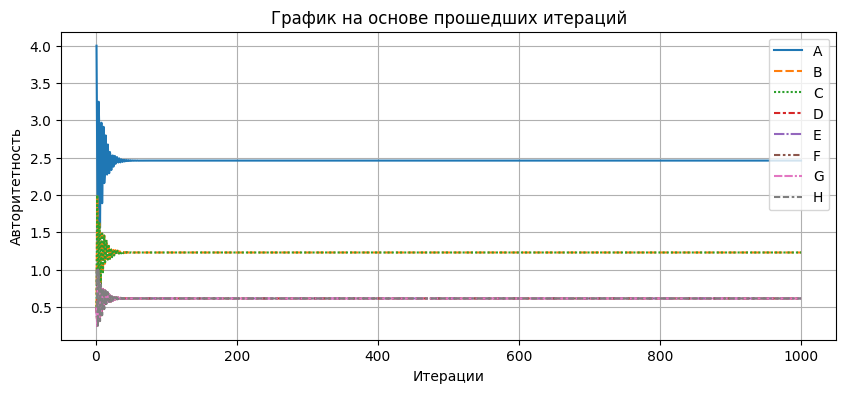

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10,4))

sns.lineplot(data=res, legend="auto")

plt.grid(True)
plt.title('График на основе прошедших итераций')
plt.xlabel('Итерации')
plt.ylabel('Авторитетность')

plt.savefig("line-1.png")

Построим более наглядные графики

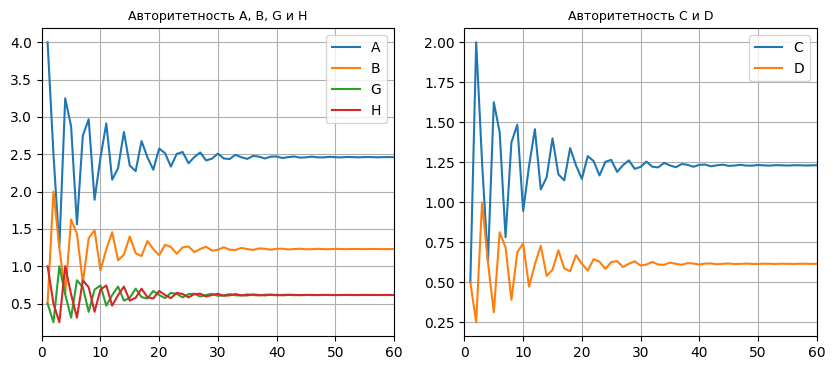

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))

axes[0].set_title('Авторитетность A, B, G и H', fontsize=9)
axes[1].set_title('Авторитетность C и D', fontsize=9)

plt.xlim(0, 60)

axes[0].plot(res[["A", "B", "G", "H"]], label=["A", "B", "G", "H"])
axes[0].legend()
axes[0].grid(True)

axes[1].plot(res[["C", "D"]], label=["C", "D"])
axes[1].legend()
axes[1].grid(True)

plt.savefig("line-2.png")


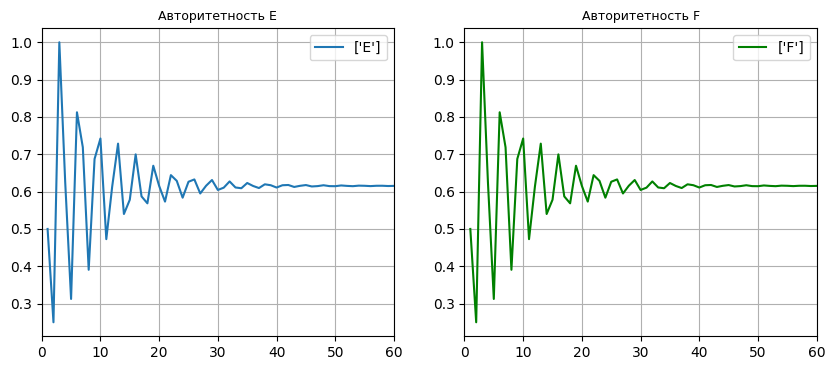

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].set_title('Авторитетность E', fontsize=9)
axes[1].set_title('Авторитетность F', fontsize=9)

plt.xlim(0, 60)

axes[0].plot(res[["E"]], label=["E"])
axes[0].legend()
axes[0].grid(True)

axes[1].plot(res[["F"]], 'g', label=["F"])
axes[1].legend()
axes[1].grid(True)

plt.savefig("line-3.png")